<a href="https://colab.research.google.com/github/vannsoko/.config/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
import torch
from torch import nn
from torchvision import datasets, transforms

In [42]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [43]:
transform = transforms.Compose([
    transforms.ToTensor(),  # Converts PIL Image to tensor (C x H x W)
])

# Load the MNIST dataset
train_dataset = datasets.MNIST(
    root='./data',          # Directory to store the dataset
    train=True,             # Load the training set
    download=True,          # Download if not available
    transform=transform,    # Apply the transform
)
test_dataset = datasets.MNIST(
    root='./data',
    train=False,
    download=True,
    transform=transform,
)

In [44]:
class MNIST(nn.Module):
  def __init__(self):
    super(MNIST, self).__init__()
    self.flatten = nn.Flatten()
    self.linear_rellu_stack = nn.Sequential(
        nn.Linear(28*28, 256),
        nn.ReLU(),
        nn.Linear(256, 128),
        nn.ReLU(),
        nn.Linear(128, 10),
    )
    self.softmax = nn.Softmax(dim=1)


  def forward(self, x):
    x = self.flatten(x)
    logits = self.linear_rellu_stack(x)
    return self.softmax(logits)

In [45]:
model = MNIST().to(device)

# Loss function
criterion = nn.CrossEntropyLoss()
optimiser = torch.optim.Adam(model.parameters(), lr=0.001)

In [50]:
image, label = train_dataset[0]
label = torch.tensor(label).to(device)
label


tensor(5, device='cuda:0')

In [52]:
from torch.utils.data import DataLoader

batch_size = 64

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [53]:
num_epochs = 10

for epoch in range(num_epochs):
  for images, labels in train_loader:
    # Move tensors to the configured device
    images = images.to(device)
    labels = labels.to(device)

    # Forward pass
    outputs = model(images)
    loss = criterion(outputs, labels)

    # Backward pass and optimisation
    optimiser.zero_grad()
    loss.backward()
    optimiser.step()
  print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [1/10], Loss: 1.5266
Epoch [2/10], Loss: 1.4617
Epoch [3/10], Loss: 1.4911
Epoch [4/10], Loss: 1.5023
Epoch [5/10], Loss: 1.5479
Epoch [6/10], Loss: 1.4806
Epoch [7/10], Loss: 1.4612
Epoch [8/10], Loss: 1.5189
Epoch [9/10], Loss: 1.5235
Epoch [10/10], Loss: 1.4628


In [65]:
image, true_label = test_dataset[7]

counter = 0
correct = 0
model.eval()
with torch.no_grad():
  for image, true_label in test_dataset:
    image = image.unsqueeze(0).to(device)
    output = model(image)
    predicted_label = torch.argmax(output, dim=1).item()
    if true_label==predicted_label:
      correct += 1
    counter += 1

print(f"{correct=}, {counter=}")
print(f"{100*correct/counter}%")


correct=9760, counter=10000
97.6%


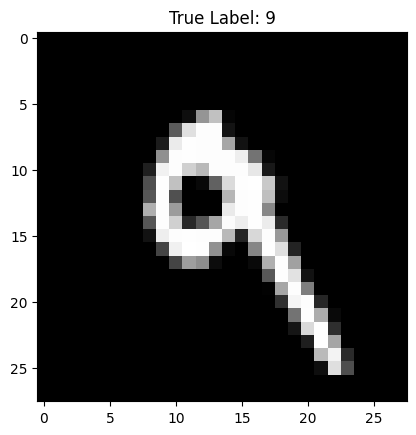

In [60]:
import matplotlib.pyplot as plt

image, label = test_dataset[7]
plt.imshow(image.squeeze(), cmap='gray')
plt.title(f"True Label: {label}")
plt.show()